## Import Library

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
import torch.nn as nn
import torch.optim as optim
import time
from torch.autograd import Variable
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
!pip install torch

## Data Preparation

In [ ]:
data_path='drive/MyDrive/Dataset'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.listdir(data_path)

['gender_classification.xlsx',
 'gender_classification.csv',
 'list_attribute.txt',
 'class_identity.txt',
 'Images',
 'results',
 '.ipynb_checkpoints',
 'train_images',
 'test_images',
 'best_model.pth']

In [ ]:
images_list = os.listdir(data_path+'/Images')

In [ ]:
# load the data
attributes = pd.read_csv("/content/drive/MyDrive/Dataset/list_attribute.txt", sep="\s+", header = 1)

In [ ]:
attributes.shape

(202599, 40)

In [ ]:
attributes.head()

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [ ]:
attributes.replace(-1, 0, inplace=True)

In [ ]:
attributes.head()

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
000001.jpg,0,1,1,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
000002.jpg,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
000003.jpg,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
000004.jpg,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
000005.jpg,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
attributes = attributes.reset_index()
attributes.rename(columns={'index': 'Img_filename'}, inplace=True)

In [ ]:
attributes.head()

,Img_filename,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,0,1,1,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
1,000002.jpg,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,000003.jpg,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,000004.jpg,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
4,000005.jpg,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
attributes.shape

(202599, 41)

In [ ]:
data_labels = attributes[['Img_filename','Male']]

In [ ]:
data_labels.duplicated().sum()

0

In [ ]:
data_labels.duplicated().sum()

0

In [ ]:
data_labels['Male'].value_counts()

,count
Male,
0,118165
1,84434


In [ ]:
data_labels['Original_filename'] = data_labels['Img_filename'].str.replace(r'\s*\(\d+\)', '', regex=True)

<ipython-input-20-cbe50e0871b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_labels['Original_filename'] = data_labels['Img_filename'].str.replace(r'\s*\(\d+\)', '', regex=True)


In [ ]:
data_labels['Original_filename'].duplicated().sum()

0

In [ ]:
image_filenames = []

for filename in images_list:
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        image_filenames.append(filename)

image_filenames = sorted(image_filenames)

In [ ]:
image_filenames[:5]

['000051.jpg', '000052.jpg', '000065.jpg', '000166.jpg', '000198.jpg']

In [ ]:
data_filenames = pd.DataFrame(image_filenames, columns=['Img_filename'])

In [ ]:
data_filenames.head()

,Img_filename
0,000051.jpg
1,000052.jpg
2,000065.jpg
3,000166.jpg
4,000198.jpg


In [ ]:
data_filenames.shape

(5017, 1)

In [ ]:
data_filenames['Cleaned_filename'] =  data_filenames['Img_filename'].str.replace(r'\(\d+\)', '', regex=True)

In [ ]:
data_filenames['Cleaned_filename'].duplicated().sum()

17

In [ ]:
data_filenames = data_filenames.drop_duplicates(subset='Cleaned_filename', keep='last')

In [ ]:
data_filenames['Cleaned_filename'].duplicated().sum()

0

In [ ]:
data_filenames.shape

(5000, 2)

In [ ]:
data_filenames.drop('Cleaned_filename', axis=1, inplace=True)

<ipython-input-32-41b2ce1597f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filenames.drop('Cleaned_filename', axis=1, inplace=True)


In [ ]:
data_filenames.head()

,Img_filename
0,000051.jpg
1,000052.jpg
2,000065.jpg
3,000166.jpg
4,000198.jpg


In [ ]:
data_filenames.reset_index(drop=True, inplace=True)

In [ ]:
data_filenames.shape

(5000, 1)

In [ ]:
labels = data_labels.set_index('Img_filename').index
img_filename = data_filenames.set_index('Img_filename').index
final_data = data_labels[labels.isin(img_filename)]

In [ ]:
final_data.shape

(5000, 3)

In [ ]:
final_data.head()

,Img_filename,Male,Original_filename
50,000051.jpg,1,000051.jpg
51,000052.jpg,1,000052.jpg
64,000065.jpg,1,000065.jpg
165,000166.jpg,1,000166.jpg
197,000198.jpg,0,000198.jpg


In [ ]:
final_data.drop('Original_filename', axis=1, inplace=True)

<ipython-input-39-cbd3fe5ed430>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.drop('Original_filename', axis=1, inplace=True)


In [ ]:
final_data.head()

,Img_filename,Male
50,000051.jpg,1
51,000052.jpg,1
64,000065.jpg,1
165,000166.jpg,1
197,000198.jpg,0


In [ ]:
final_data.value_counts('Male')

,count
Male,
0,2953
1,2047


In [ ]:
import cv2

In [ ]:
images = []

for filename in final_data.Img_filename:
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join('/content/drive/MyDrive/Dataset/Images/', filename)
        if os.path.exists(img_path):
          img = cv2.imread(img_path)
          if img is not None:
              images.append(img)

In [ ]:
len(images)

5000

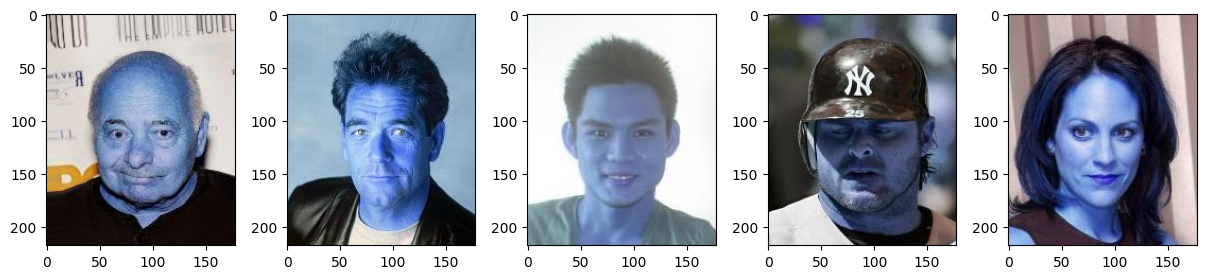

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for ax, img in zip(axes, images[:5]):
    ax.imshow(img)

plt.show()

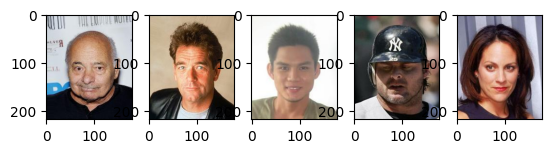

In [ ]:
for i, img in enumerate(images[:5]):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img_rgb)

plt.show()

In [ ]:
for img in images:
  print(img.shape)

(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 

In [ ]:
final_data['Image'] = images

<ipython-input-48-cd6286b3a0c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['Image'] = images


In [ ]:
final_data.head()

,Img_filename,Male,Image
50,000051.jpg,1,"[[[191, 185, 178], [195, 189, 182], [162, 156,..."
51,000052.jpg,1,"[[[156, 185, 200], [156, 185, 200], [157, 186,..."
64,000065.jpg,1,"[[[240, 245, 244], [240, 245, 244], [240, 245,..."
165,000166.jpg,1,"[[[122, 126, 114], [121, 125, 113], [121, 125,..."
197,000198.jpg,0,"[[[154, 131, 129], [156, 133, 131], [157, 134,..."


In [ ]:
# split the data into train and test sets
train_data, test_data = train_test_split(final_data, test_size=0.3, random_state=42)

## Preprocessing

In [ ]:
from skimage import io

class GenderDataset(Dataset):
    def __init__(self, data, image_folder_path, transform=None):
        self.data = data
        self.image_folder_path = image_folder_path
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image_path = os.path.join(self.image_folder_path, self.data.iloc[idx, 0])
        image = io.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        gender = self.data.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        return image, torch.tensor(gender, dtype=torch.long)

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(), transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [ ]:
train_set = GenderDataset(train_data, image_folder_path=os.path.join(data_path, "Images"), transform=transform)
train_loader = DataLoader(train_set, batch_size=32, shuffle=True, num_workers=2)

test_set = GenderDataset(test_data, os.path.join(data_path, "Images"), transform=transform)
test_loader = DataLoader(test_set, batch_size=32, shuffle=False, num_workers=2)

## Architecture

In [ ]:
use_gpu = torch.cuda.is_available()

In [ ]:
model = models.googlenet()
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)

if use_gpu:
    model = model.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

/usr/local/lib/python3.10/dist-packages/torchvision/models/googlenet.py:47: FutureWarning: The default weight initialization of GoogleNet will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(


## Modeling

In [ ]:
import time
from torch.autograd import Variable

def train_model(model, criterion, optimizer, num_epochs=10):
    since = time.time()

    best_model_wts = model.state_dict()
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        for phase in ['train', 'test']:
            if phase == 'train':
                model.train(True)
            else:
                model.train(False)

            running_loss = 0.0
            running_corrects = 0


            for data in dataloaders[phase]:
                inputs, labels = data

                if use_gpu:
                    inputs = Variable(inputs.cuda())
                    labels = Variable(labels.cuda())
                else:
                    inputs, labels = Variable(inputs), Variable(labels)

                optimizer.zero_grad()
                outputs = model(inputs)

                if phase == 'train':
                    _, preds = torch.max(outputs.logits, 1)
                    loss = criterion(outputs.logits, labels)
                    loss.backward()
                    optimizer.step()
                else:
                    _, preds = torch.max(outputs.data, 1)
                    loss = criterion(outputs, labels)


                running_loss += loss.data
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.float() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))


            if phase == 'test' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()
                state = {'model':model.state_dict(),'optim':optimizer.state_dict()}
                torch.save(state,'/content/drive/MyDrive/Dataset/best_model.pth')

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best test Acc: {:4f}'.format(best_acc))

    model.load_state_dict(best_model_wts)
    return model

In [ ]:
dataloaders = {
    "train":train_loader, "test":test_loader
}
dataset_sizes= {
    "train":len(train_set), "test":len(test_set)
}

In [ ]:
model = train_model(model, criterion, optimizer, 10)

Epoch 0/9
----------
train Loss: 0.0129 Acc: 0.8166
test Loss: 0.0144 Acc: 0.7847

Epoch 1/9
----------
train Loss: 0.0106 Acc: 0.8503
test Loss: 0.0135 Acc: 0.8060

Epoch 2/9
----------
train Loss: 0.0067 Acc: 0.9094
test Loss: 0.0096 Acc: 0.8740

Epoch 3/9
----------
train Loss: 0.0053 Acc: 0.9369
test Loss: 0.0060 Acc: 0.9287

Epoch 4/9
----------
train Loss: 0.0043 Acc: 0.9454
test Loss: 0.0073 Acc: 0.8927

Epoch 5/9
----------
train Loss: 0.0031 Acc: 0.9611
test Loss: 0.0065 Acc: 0.9200

Epoch 6/9
----------
train Loss: 0.0025 Acc: 0.9706
test Loss: 0.0089 Acc: 0.8980

Epoch 7/9
----------
train Loss: 0.0024 Acc: 0.9714
test Loss: 0.0068 Acc: 0.9200

Epoch 8/9
----------
train Loss: 0.0027 Acc: 0.9700
test Loss: 0.0077 Acc: 0.9120

Epoch 9/9
----------
train Loss: 0.0017 Acc: 0.9780
test Loss: 0.0057 Acc: 0.9420

Training complete in 4m 32s
Best test Acc: 0.942000
